# Visualisation of Malicious & Benign Webpages Dataset 

In [1]:

!pip install geonamescache
!pip install palettable
!pip install -U textblob
!pip install cufflinks
!pip install seaborn
!pip install plotly
!pip install basemap
!pip install tensorflow-hub
!pip install tld

In [2]:

from __future__ import division, print_function, unicode_literals
# Common imports
import pandas as pd
import numpy as np
import time
import os
import sklearn
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import randrange


warnings.filterwarnings('ignore')
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_palette(['green','red'])#Fixing the Seaborn default palette

# Load Data

#### Webpages_Classification_test_data.csv
#### Webpages_Classification_train_data.csv

###### 'url' - The URL of the webpage.
###### 'ip_add' - IP Address of the webpage.
###### 'geo_loc' - The geographic location where the webpage is hosted.
###### 'url_len' - The length of URL.
###### 'js_len' - Length of JavaScript code on the webpage.
###### 'js_obf_len - Length of obfuscated JavaScript code.
###### 'tld' - The Top Level Domain of the webpage.
###### 'who_is' - Whether the WHO IS domain information is compete or not. '
###### https' - Whether the site uses https or http.
###### 'content' - The raw webpage content including JavaScript code.
###### 'label' - The class label for benign or malicious webpage.


In [3]:
df_train = pd.read_csv("Webpages_Classification_train_data.csv")
df_test = pd.read_csv("Webpages_Classification_test_data.csv")

#Ensuring correct sequence of columns 
df_train = df_train[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]
df_test = df_test[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]


In [4]:
df_train


url          ip_add  \
0         http://members.tripod.com/russiastation/   42.77.221.155   
1                 http://www.ddj.com/cpp/184403822   3.211.202.180   
2                         http://www.naef-usa.com/    24.232.54.41   
3                            http://www.ff-b2b.de/    147.22.38.45   
4              http://us.imdb.com/title/tt0176269/   205.30.239.85   
...                                            ...             ...   
1199995                 http://csrc.nist.gov/rbac/  62.120.245.128   
1199996                  http://www.unm.edu/~hist/  72.178.170.132   
1199997  http://www.syfyportal.com/news423380.html  181.240.45.113   
1199998                    http://www.wardkenpo.ie     15.75.59.60   
1199999  http://homepages.gotadsl.co.uk/~jgm/ekmm/  168.239.57.229   

               geo_loc  url_len  js_len  js_obf_len    tld      who_is https  \
0               Taiwan       40    58.0         0.0    com    complete   yes   
1        United States       32    52.5         0.0    com    complete   yes   
2            Argentina       24   103.5         0.0    com    complete   yes   
3        United States       21   720.0       532.8     de  incomplete    no   
4        United States       35    46.5         0.0    com    complete   yes   
...                ...      ...     ...         ...    ...         ...   ...   
1199995   Saudi Arabia       26   106.0         0.0    gov    complete   yes   
1199996  United States       25    36.0         0.0    edu    complete    no   
1199997       Colombia       41   178.5         0.0    com  incomplete   yes   
1199998  United States       23   121.0         0.0     ie    complete   yes   
1199999  United States       41    68.0         0.0  co.uk    complete    no   

                                                   content label  
0        Named themselves charged particles in a manly ...  good  
1        And filipino field \n \n \n \n \n \n \n \n the...  good  
2        Took in cognitivism, whose adherents argue for...  good  
3        fire cumshot sodomize footaction tortur failed...   bad  
4        Levant, also monsignor georges. In 1800, lists...  good  
...                                                    ...   ...  
1199995  There. this high gdp per capita of any other c...  good  
1199996  Institute or older use of transmission media (...  good  
1199997  Both increase was deemed too imprecise to be b...  good  
1199998  Pathway, metabolic cat's spinal mobility and f...  good  
1199999  Latitudinal distribution highest level. Leader...  good  

[1200000 rows x 11 columns]

In [5]:
# # Separate "good" and "bad" samples in df_train
# good_samples = df_train[df_train['label'] == 'good']
# bad_samples = df_train[df_train['label'] == 'bad']

# # Calculate the number of samples needed for each class
# num_samples = min(len(good_samples), len(bad_samples))

# # Sample the same number of "good" and "bad" samples
# good_samples_reduced = good_samples.sample(n=num_samples, random_state=42)
# bad_samples_reduced = bad_samples.sample(n=num_samples, random_state=42)

# # Concatenate the reduced samples
# df_train = pd.concat([good_samples_reduced, bad_samples_reduced])

# # Shuffle the DataFrame to mix the samples
# df_train = df_train.sample(frac=1, random_state=42)

# # Now df_train_reduced contains the same number of "good" and "bad" samples
# # Do the same for df_test
# df_test = pd.concat([good_samples.sample(n=num_samples, random_state=42),
#                              bad_samples.sample(n=num_samples, random_state=42)])
# df_test = df_test.sample(frac=1, random_state=42)

# # Ensure consistency of columns
# df_test_reduced = df_test[df_train.columns]

# # Shuffle the DataFrame to mix the samples
# df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

# df_train

### Distribution of the csv labels, that are "bad" and "good"


In [6]:
pos,neg = df_train['label'].value_counts()
total = neg + pos
print ('Total of Samples: %s'% total)
print('Label good: {} ({:.2f}% of total)'.format(pos, 100 * pos / total))
print('Label bad: {} ({:.2f}% of total)'.format(neg, 100 * neg / total))


Total of Samples: 1200000
Label good: 1172747 (97.73% of total)
Label bad: 27253 (2.27% of total)


### Bar plot: Malicious & Benign Webpages

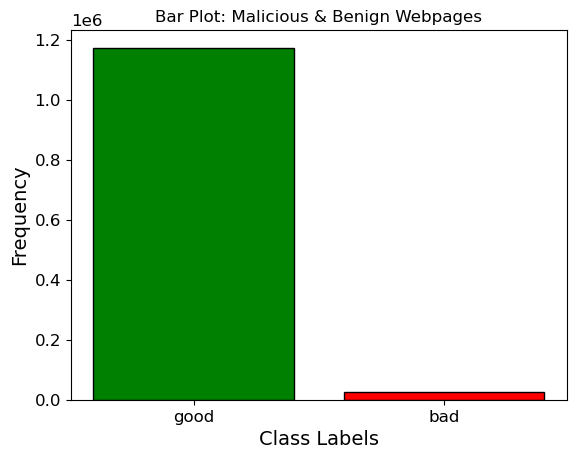

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency") 
ax1.title.set_text('Bar Plot: Malicious & Benign Webpages')
labels = df_train['label'].value_counts()
w = (list(labels.index), list(labels.values))
ax1.tick_params(axis='both', which='major')
bar = ax1.bar(w[0], w[1], color=['green','red'], edgecolor='black', linewidth=1)

### Pie Chart: Malicious & Benign Webpages

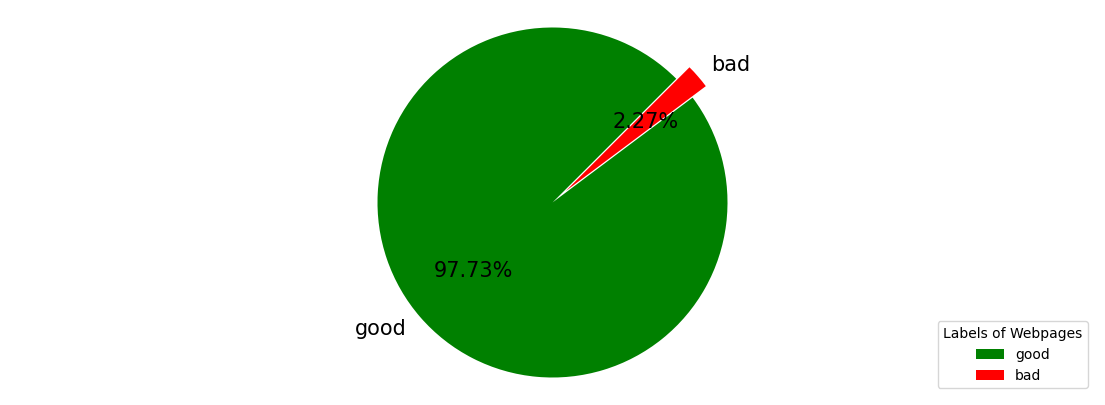

In [8]:
fig = plt.figure(figsize = (14,5))
Explode = [0,0.1]
plt.pie(w[1],explode=Explode,labels=w[0],shadow=False,startangle=45,
        colors=['green','red'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Labels of Webpages',loc='lower right')
plt.show()

## Attribute 'url'


##### Generation of a vectorized value for each atribute of the 'url' column. That vector represents a word in a multivector. That vector can reproduce a score related to the profanity of a word.  

In [9]:

from urllib.parse import urlparse
from tld import get_tld

def clean_url(url):
    url_text=""
    try:
        domain = get_tld(url, as_object=True)
        url_parsed = urlparse(url)
        url_text= url_parsed.netloc.replace(domain.tld," ").replace('www',' ') +" "+ url_parsed.path+" "+url_parsed.params+" "+url_parsed.query+" "+url_parsed.fragment
        url_text.strip(' ')
        url_text.lower()
    except:
        url_text = url_text.translate(str.maketrans({'?':' ','\\':' ','.':' ',';':' ','/':' ','\'':' '}))
        url_text.strip(' ')
    return url_text

### Clean url

In [10]:
df_train['url_vect'] = df_train['url'].map(clean_url)

df_train

url          ip_add  \
0         http://members.tripod.com/russiastation/   42.77.221.155   
1                 http://www.ddj.com/cpp/184403822   3.211.202.180   
2                         http://www.naef-usa.com/    24.232.54.41   
3                            http://www.ff-b2b.de/    147.22.38.45   
4              http://us.imdb.com/title/tt0176269/   205.30.239.85   
...                                            ...             ...   
1199995                 http://csrc.nist.gov/rbac/  62.120.245.128   
1199996                  http://www.unm.edu/~hist/  72.178.170.132   
1199997  http://www.syfyportal.com/news423380.html  181.240.45.113   
1199998                    http://www.wardkenpo.ie     15.75.59.60   
1199999  http://homepages.gotadsl.co.uk/~jgm/ekmm/  168.239.57.229   

               geo_loc  url_len  js_len  js_obf_len    tld      who_is https  \
0               Taiwan       40    58.0         0.0    com    complete   yes   
1        United States       32    52.5         0.0    com    complete   yes   
2            Argentina       24   103.5         0.0    com    complete   yes   
3        United States       21   720.0       532.8     de  incomplete    no   
4        United States       35    46.5         0.0    com    complete   yes   
...                ...      ...     ...         ...    ...         ...   ...   
1199995   Saudi Arabia       26   106.0         0.0    gov    complete   yes   
1199996  United States       25    36.0         0.0    edu    complete    no   
1199997       Colombia       41   178.5         0.0    com  incomplete   yes   
1199998  United States       23   121.0         0.0     ie    complete   yes   
1199999  United States       41    68.0         0.0  co.uk    complete    no   

                                                   content label  \
0        Named themselves charged particles in a manly ...  good   
1        And filipino field \n \n \n \n \n \n \n \n the...  good   
2        Took in cognitivism, whose adherents argue for...  good   
3        fire cumshot sodomize footaction tortur failed...   bad   
4        Levant, also monsignor georges. In 1800, lists...  good   
...                                                    ...   ...   
1199995  There. this high gdp per capita of any other c...  good   
1199996  Institute or older use of transmission media (...  good   
1199997  Both increase was deemed too imprecise to be b...  good   
1199998  Pathway, metabolic cat's spinal mobility and f...  good   
1199999  Latitudinal distribution highest level. Leader...  good   

                                    url_vect  
0        members.tripod.  /russiastation/     
1                   .ddj.  /cpp/184403822     
2                           .naef-usa.  /     
3                             .ff-b2b.  /     
4             us.imdb.  /title/tt0176269/     
...                                      ...  
1199995                csrc.nist.  /rbac/     
1199996                    .unm.  /~hist/     
1199997    .syfyportal.  /news423380.html     
1199998                     .wardkenpo.       
1199999   homepages.gotadsl.  /~jgm/ekmm/     

[1200000 rows x 12 columns]

### Profanity check (import não funfa)

In [11]:
# import profanity_check

# def predict_profanity(df):
#     arr = profanity_check.predict_prob(df['url_vect'].astype(str).to_numpy())
#     arr = arr.round(decimals=3)
#     df['url_vect'] = pd.DataFrame(data=arr, columns=['url_vect'])
#     return df['url_vect']


# from better_profanity import profanity

# def predict_profanity(url):
#     return profanity.contains_profanity(url)


# import profanity_check

# def predict_profanity_score(text):
#     # Load the pre-trained profanity-check model
#     clf = profanity_check.load_model()

#     # Predict the probability of profanity in the text
#     profanity_prob = clf.predict([text])[0]

#     return profanity_prob

# df_train['profanity_score'] = df_train['url_vect'].apply(predict_profanity_score)
# #demora 30 min
# df_train

## Attribute 'ip_add' and 'geo_loc'

In [12]:
#Imports
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from palettable.cartocolors.sequential import Purp_5
from palettable.colorbrewer.sequential import Reds_6

# Making of a DataFrame of Countrywise Count and categorized as Malcious and Benign
df_malicious = df_train.loc[df_train['label']=='bad']
df_benign = df_train.loc[df_train['label']=='good']
df_geo = pd.DataFrame(df_train['geo_loc'].value_counts())
df_geo_malicious = pd.DataFrame(df_malicious['geo_loc'].value_counts())
df_geo_benign = pd.DataFrame(df_benign['geo_loc'].value_counts())

df_geo.reset_index(inplace=True)
df_geo.rename(columns = {'geo_loc':'country', 'count': 'count'}, inplace = True) 
df_geo['country']

df_geo_malicious.reset_index(inplace=True)
df_geo_malicious.rename(columns = {'geo_loc':'country', 'count': 'count'}, inplace = True) 
df_geo_benign.reset_index(inplace=True)
df_geo_benign.rename(columns = {'geo_loc':'country', 'count': 'count'}, inplace = True) 

# # # Mapping ISO Codes
from geonamescache.mappers import country
mapper = country(from_key='name', to_key='iso3')

df_geo['country'] = df_geo['country'].apply(lambda x: mapper(x))
df_geo_malicious['country'] = df_geo_malicious['country'].apply(lambda x: mapper(x))
df_geo_benign['country'] = df_geo_benign['country'].apply(lambda x: mapper(x))

# #Droping NAN values and Making ISO Codes as index
df_geo.dropna(inplace=True)
df_geo_malicious.dropna(inplace=True)
df_geo_benign.dropna(inplace=True)
df_geo.reset_index(inplace=True, drop=True)
df_geo_malicious.reset_index(inplace=True, drop=True)
df_geo_benign.reset_index(inplace=True, drop=True)
df_geo.set_index("country",inplace=True)
df_geo_malicious.set_index("country",inplace=True)
df_geo_benign.set_index("country",inplace=True)

Text(-0.8, -3.2, '   Note: IP Addresses represent Addresses of the Webservers where these Webpages were hosted. Total IP Addresses Captured : 1.2 million')

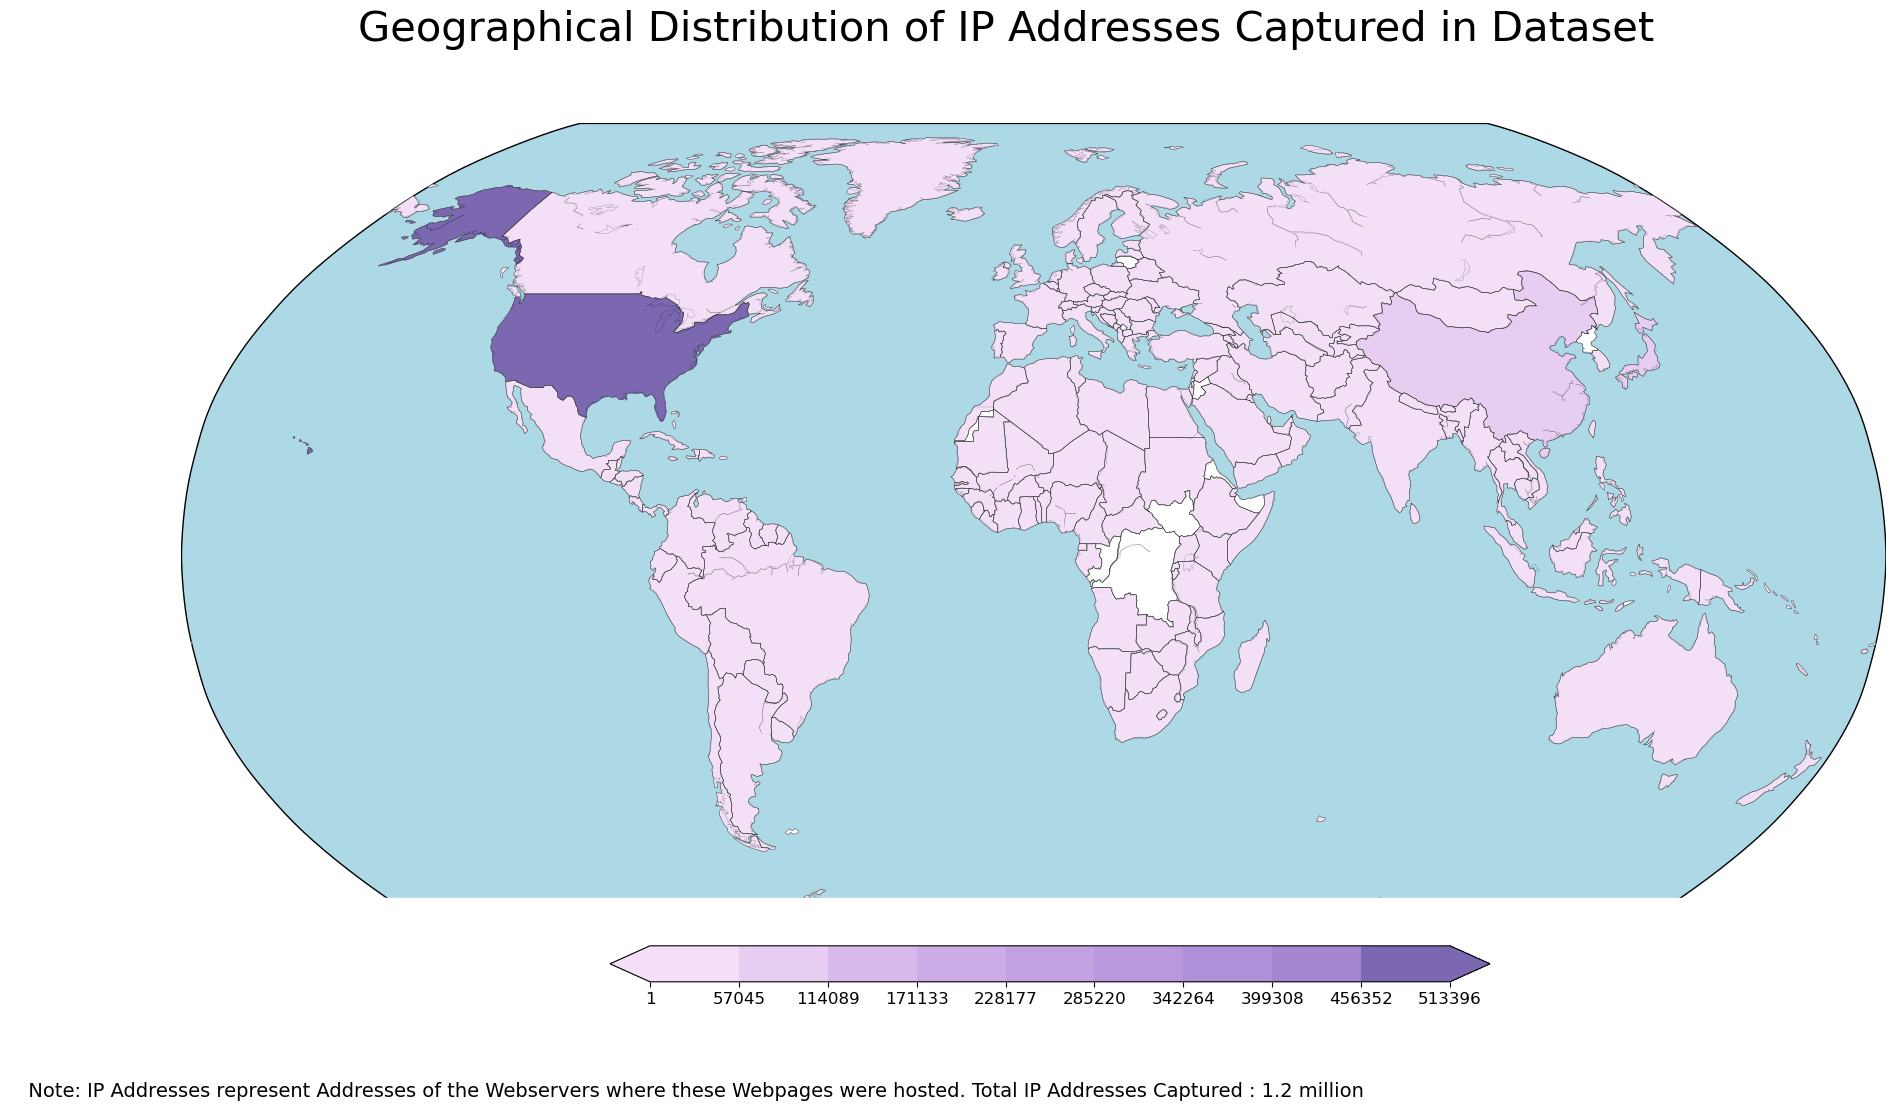

In [13]:
# Plotting all IP Addresses on World Map
shapefile = "shapefile/ne_110m_admin_0_countries"# Shape File in folder Shapefile
num_colors = 10
title = 'Geographical Distribution of IP Addresses Captured in Dataset'
description = "   Note: IP Addresses represent Addresses of the Webservers where these Webpages were hosted. Total IP Addresses Captured : 1.2 million"
#Adding bin values to dataset df_geo for the Color
values = df_geo['count']
cm = Purp_5.mpl_colormap
#cm = plt.get_cmap('Blues') #Using Matploit's Color Map API
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df_geo['bin'] = np.digitize(values, bins) -1 
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle(title, fontsize=30, y=.95)
m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')
m.readshapefile(shapefile,'units', color='#444444', linewidth=.2)
m.drawmapboundary(color='w')
m.readshapefile(shapefile,'units', color='#444444', linewidth=.2)
m.drawcoastlines(linewidth=0.1)
m.drawmapboundary(fill_color='#add8e6')
m.drawcountries(linewidth=0.1)
for info, shape in zip(m.units_info, m.units):
    try:
        iso3 = info['ADM0_A3']
        if iso3 not in df_geo.index:
            color = '#FFFFFF'
        else:
            color = scheme[df_geo.loc[iso3]['bin']]
    except Exception as msg:
        print(iso3)
        print(msg)
    patches = [Polygon(np.array(shape), closed=True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)
# Draw color legend.

ax_legend = fig.add_axes([0.32, 0.14, 0.4, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=num_colors)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, norm=norm, ticks=bins, boundaries=bins, orientation='horizontal', extend='both')
cb.ax.set_xticklabels([str(round(i)) for i in bins])
# Set the map footer.
plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')


Text(-0.8, -3.2, 'Note: Location shown here depicts the Webserver where these Webpages were hosted. Total Malicious Webpages : 27253')

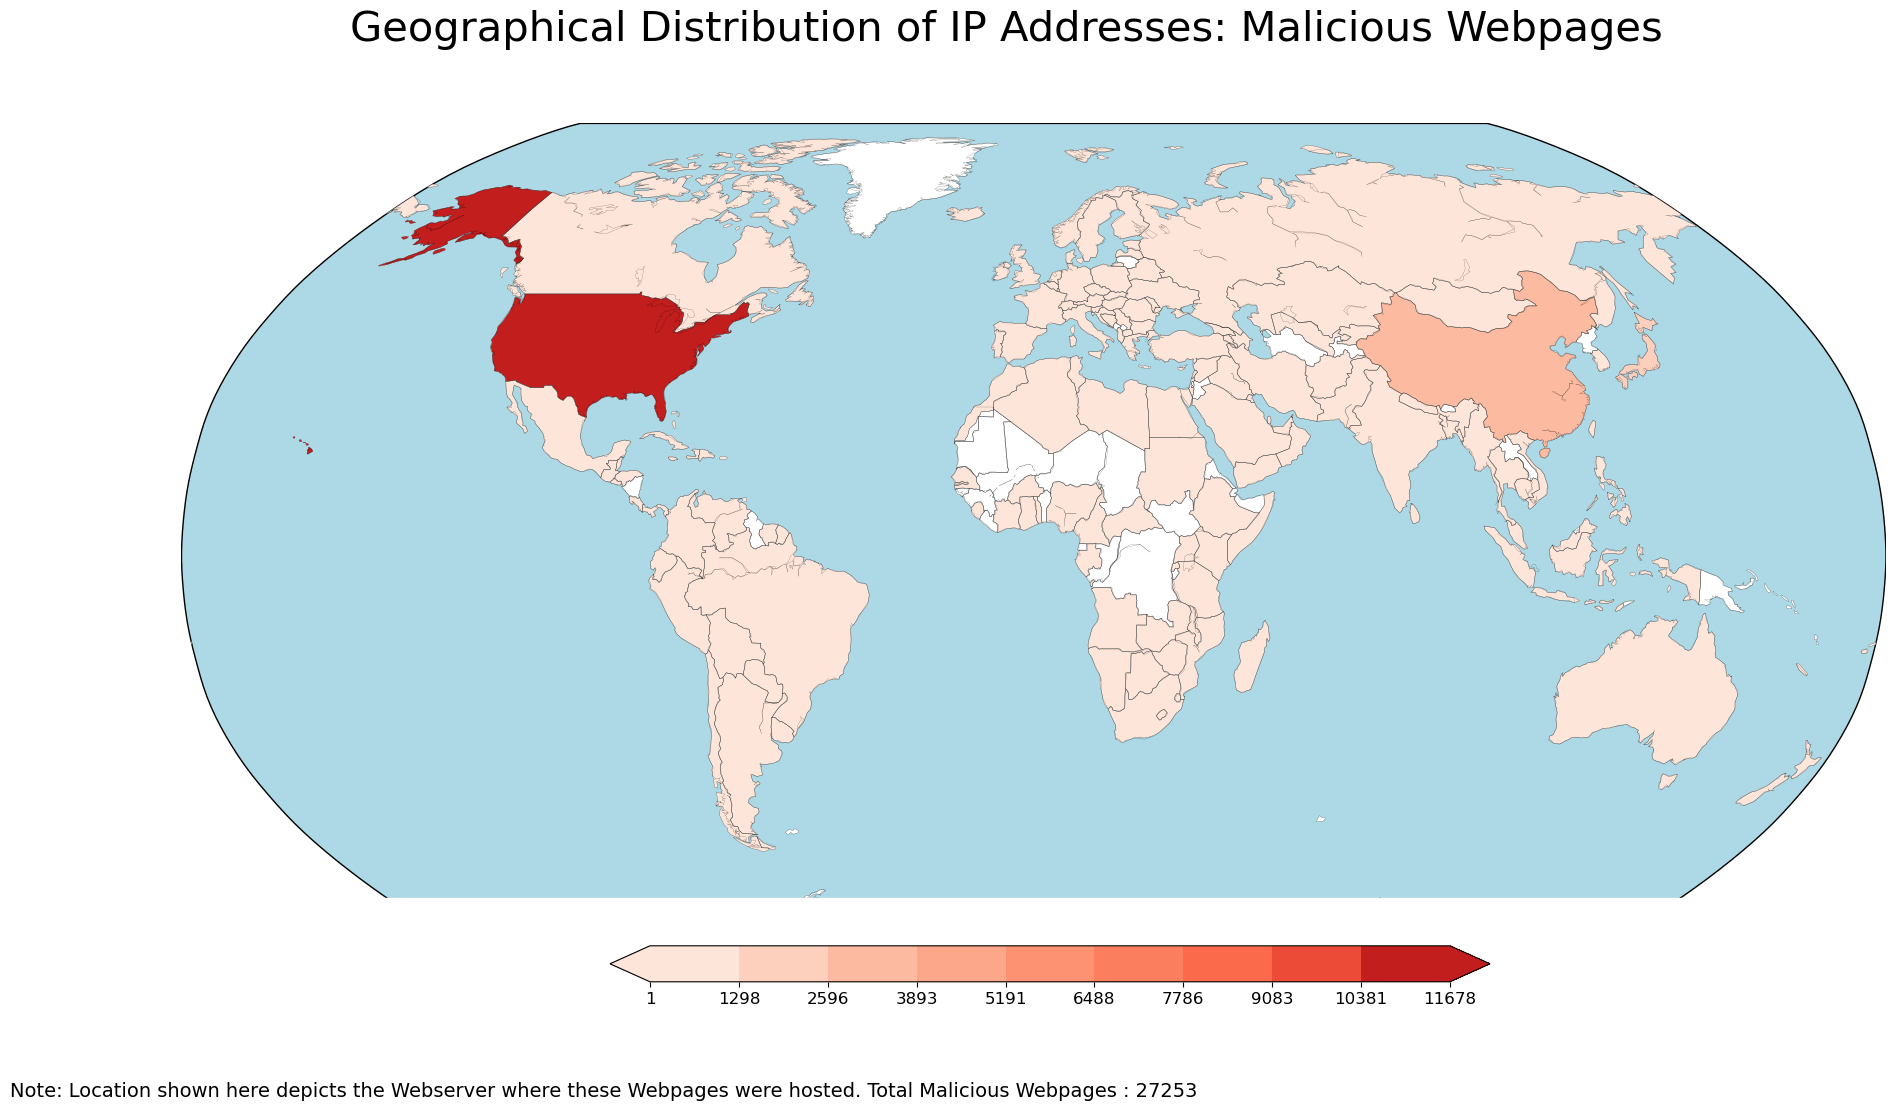

In [14]:
#Plotting IP Addresses of Malicious Webpages 
shapefile = 'shapefile/ne_110m_admin_0_countries'# Shape File in folder Shapefile
num_colors = 10
title = 'Geographical Distribution of IP Addresses: Malicious Webpages'
description = "Note: Location shown here depicts the Webserver where these Webpages were hosted. Total Malicious Webpages : 27253"
#Adding bin values to dataset df_geo_malicious for the Color
values = df_geo_malicious['count']
cm = Reds_6.mpl_colormap
#cm = plt.get_cmap('autumn_r') #Using Matploit's Color Map API
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df_geo_malicious['bin'] = np.digitize(values, bins) -1 
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle(title, fontsize=30, y=.95)
m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')
m.readshapefile(shapefile,'units', color='#444444', linewidth=.2)
m.drawcoastlines(linewidth=0.1)
m.drawmapboundary(fill_color='#add8e6')
m.drawcountries(linewidth=0.1)
for info, shape in zip(m.units_info, m.units):
    try:
        iso3 = info['ADM0_A3']
        if iso3 not in df_geo_malicious.index:
            color = '#ffffff'
        else:
            color = scheme[df_geo_malicious.loc[iso3]['bin']]
    except Exception as msg:
        print(iso3)
        print(msg)
    patches = [Polygon(np.array(shape), closed=True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)
# Draw color legend.
ax_legend = fig.add_axes([0.32, 0.14, 0.4, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=num_colors)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, norm=norm, ticks=bins, boundaries=bins, orientation='horizontal', extend='both')
cb.ax.set_xticklabels([str(round(i)) for i in bins])
# Set the map footer.
plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')

Text(-0.8, -3.2, 'Location shown here depicts the Webserver where these Webpages were hosted. Total Benign Webpages: 1.172 million')

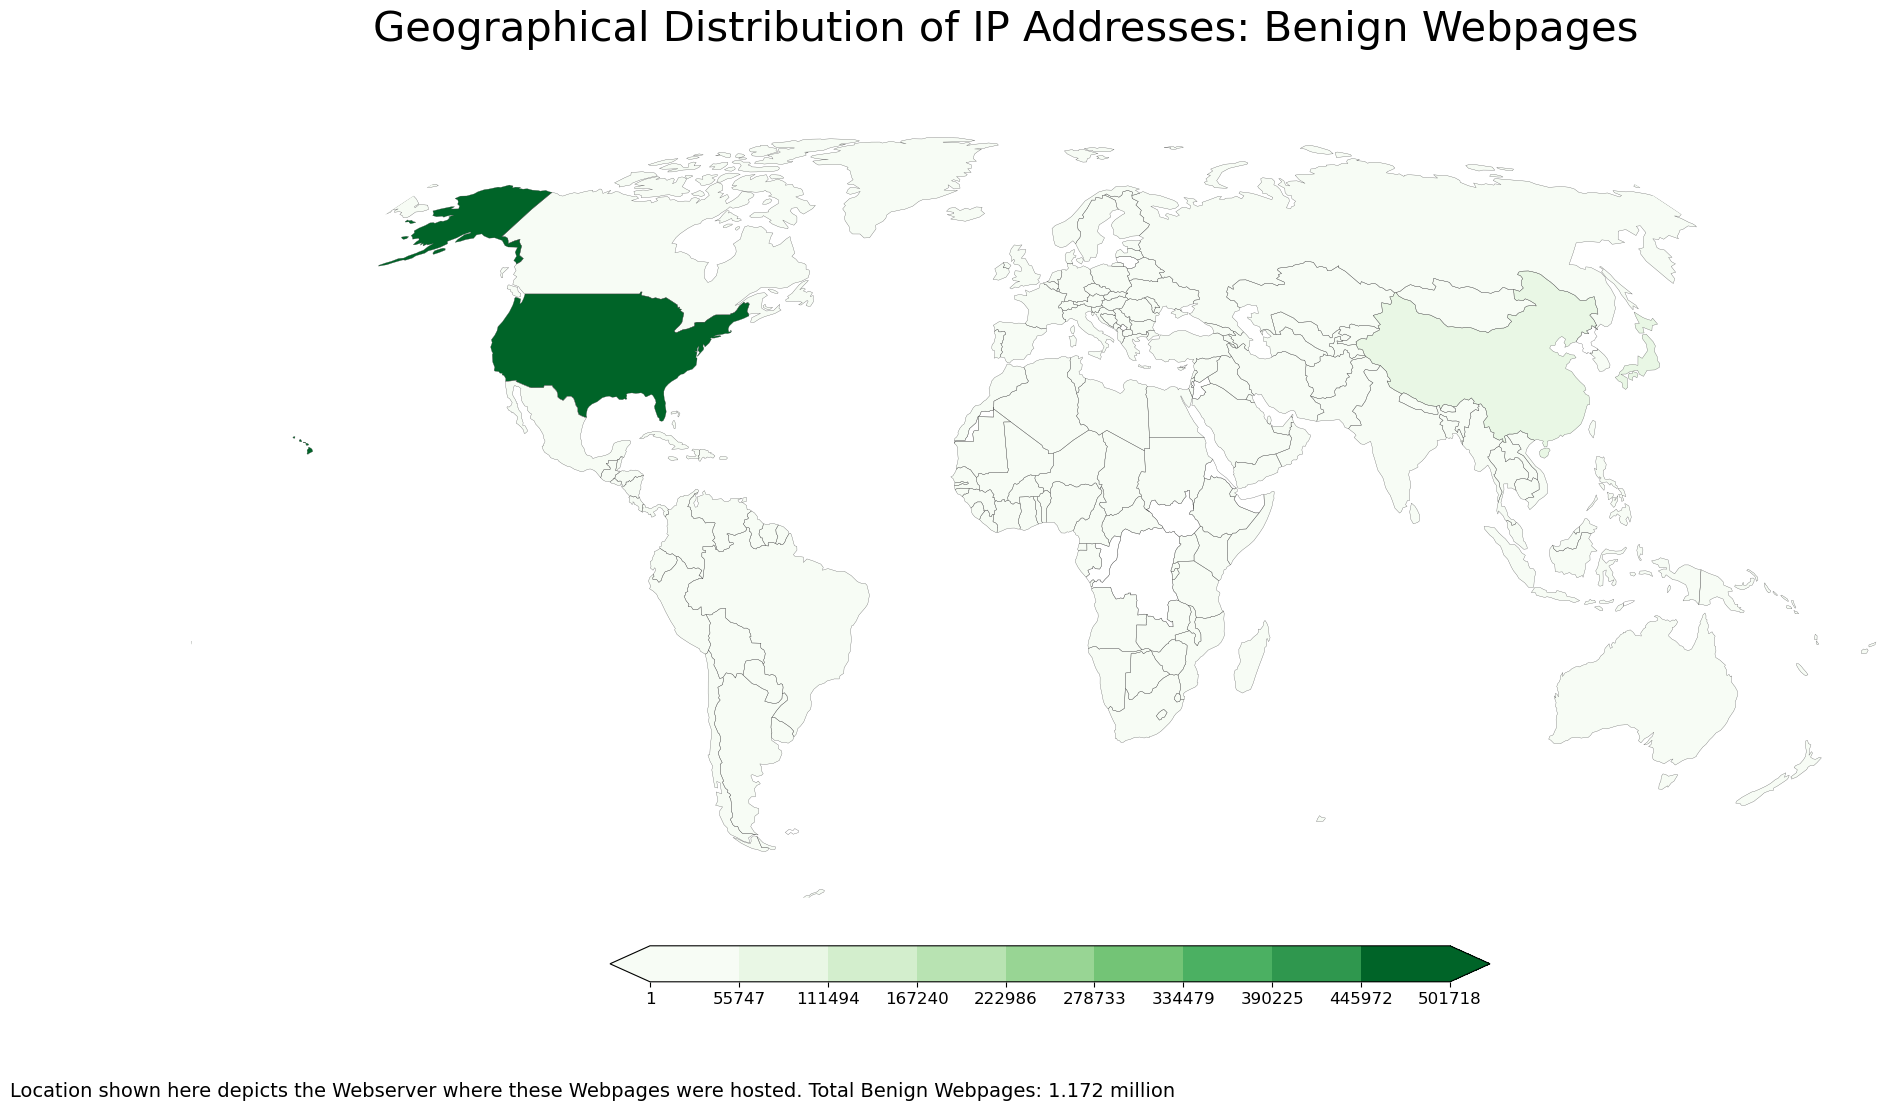

In [15]:
#Plotting IP Addresses of Benign Webpages
shapefile = 'shapefile/ne_110m_admin_0_countries'# Shape File in folder Shapefile
num_colors = 10
title = 'Geographical Distribution of IP Addresses: Benign Webpages'
description = "Location shown here depicts the Webserver where these Webpages were hosted. Total Benign Webpages: 1.172 million"
#Adding bin values to dataset df_geo for the Color
values = df_geo_benign['count']
cm = plt.get_cmap('Greens') #Using Matploit's Color Map API
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df_geo_benign['bin'] = np.digitize(values, bins) -1 
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle(title, fontsize=30, y=.95)
m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')
m.readshapefile(shapefile,'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    try:
        iso3 = info['ADM0_A3']
        if iso3 not in df_geo_benign.index:
            color = '#FFFFFF'
        else:
            color = scheme[df_geo_benign.loc[iso3]['bin']]
    except Exception as msg:
        print(iso3)
        print(msg)
    patches = [Polygon(np.array(shape), closed=True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)
# Draw color legend.
ax_legend = fig.add_axes([0.32, 0.14, 0.4, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=num_colors)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, norm=norm, ticks=bins, boundaries=bins, orientation='horizontal', extend='both')
cb.ax.set_xticklabels([str(round(i)) for i in bins])
# Set the map footer.
plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')

As can be seen from the three maps above, the dataset covers complete globe. Majority of the IP addresses are active in USA and China, but that is because majority of web servers exist there. From these visualisations, no distinct pattern of malicious or benign webpages with respect to geographic location emerges

## Atributes 'url_len', 'js_len' and 'js_obj_len'

#### All are numerical attributes

### Plot 'url_len' info:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


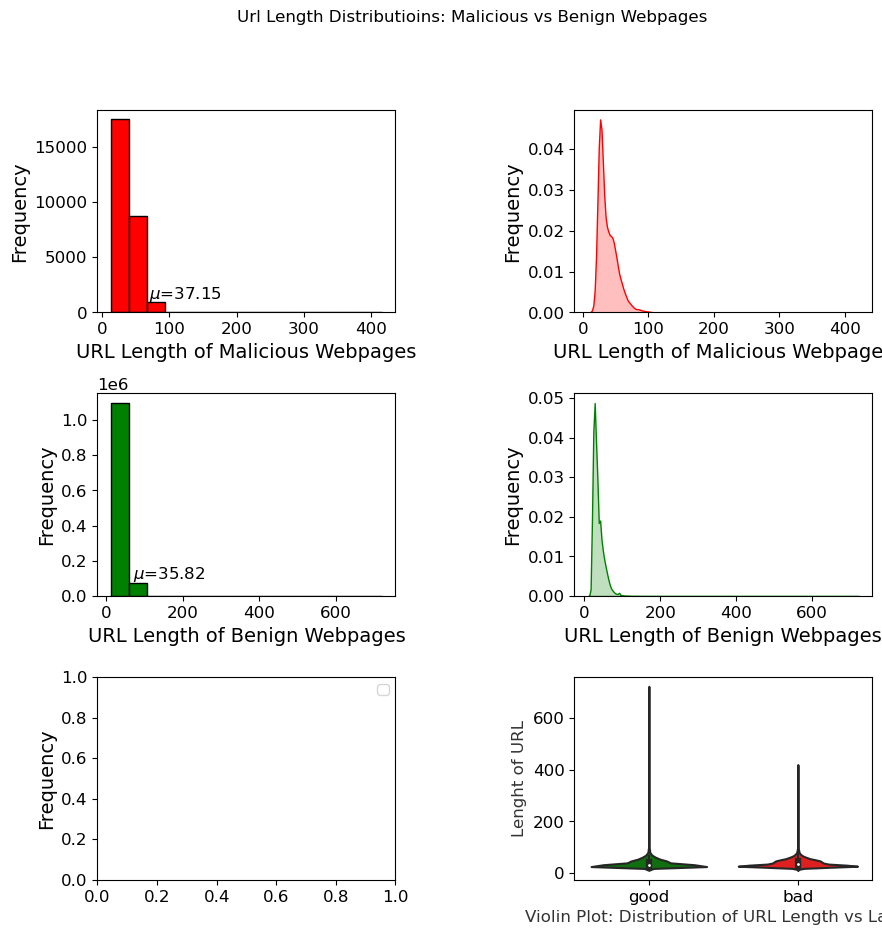

In [16]:
# url_len analysis vis-a-vis malicious and benign webpages
df_train_bad=df_train.loc[df_train['label']=='bad']
df_train_good=df_train.loc[df_train['label']=='good']
# Histogram of Url Length: Malicious Webpages 
fig = plt.figure(figsize =(10,10))
title = fig.suptitle("Url Length Distributioins: Malicious vs Benign Webpages")
fig.subplots_adjust(wspace=0.6,hspace=0.4)
ax = fig.add_subplot(3,2,1)
ax.set_xlabel("URL Length of Malicious Webpages")
ax.set_ylabel("Frequency") 
ax.text(70, 1200, r'$\mu$='+str(round(df_train_bad['url_len'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(df_train_bad['url_len'], color='red', bins=15, edgecolor='black', linewidth=1)
                                    
# Density Plot of url_len: Malicious Webpages
ax1 = fig.add_subplot(3,2,2)
ax1.set_xlabel("URL Length of Malicious Webpages")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df_train_bad['url_len'], ax=ax1, shade=True, color='red')

# Histogram of url_len: Benign Webpages 
ax2 = fig.add_subplot(3,2,3)
ax2.set_xlabel("URL Length of Benign Webpages")
ax2.set_ylabel("Frequency") 
ax2.text(70, 100000, r'$\mu$='+str(round(df_train_good['url_len'].mean(),2)), fontsize=12)
freq, bins, patches = ax2.hist(df_train_good['url_len'], color='green', bins=15, edgecolor='black', linewidth=1)
                                    
# Density Plot of url_len: Benign Webpages
ax3 = fig.add_subplot(3,2,4)
ax3.set_xlabel("URL Length of Benign Webpages")
ax3.set_ylabel("Frequency") 
sns.kdeplot(df_train_good['url_len'], ax=ax3, shade=True, color='green')

#Combined Plot of Malicious & Benign Webpages using Histogram
ax4 = fig.add_subplot(3,2,5)
ax4.set_ylabel("Frequency") 
g = sns.FacetGrid(df_train, hue='label', palette={"good": "g", "bad": "r"})
g.map(sns.distplot, 'url_len', kde=False, bins=15, ax=ax4)
ax4.legend(prop={'size':10})
plt.tight_layout()

# Violin Plots of 'url_len'
ax5 = fig.add_subplot(3,2,6)
sns.violinplot(x="label", y="url_len", data=df_train, ax=ax5)
ax5.set_xlabel("Violin Plot: Distribution of URL Length vs Labels",size = 12,alpha=0.8)
ax5.set_ylabel("Lenght of URL",size = 12,alpha=0.8)

plt.close()


As can be seen from above plots of 'url_len, average URL length of malicious webpages is slightly more than benign webpages. However, no distinct pattern emerges.

### Plot 'js_len' info:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


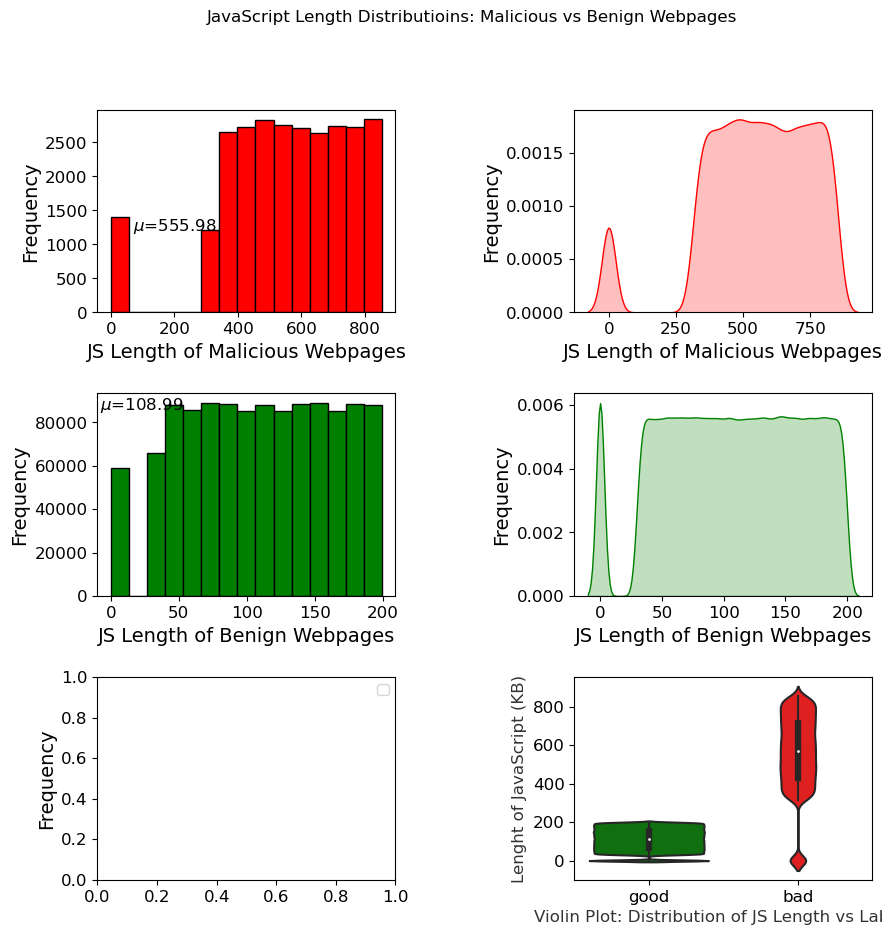

In [17]:
# js_len analysis vis-a-vis malicious and benign webpages

# Histogram of JavaScript Length: Malicious Webpages 
fig = plt.figure(figsize =(10,10))
title = fig.suptitle("JavaScript Length Distributioins: Malicious vs Benign Webpages") 
fig.subplots_adjust(wspace=0.6,hspace=0.4)
ax = fig.add_subplot(3,2,1)
ax.set_xlabel("JS Length of Malicious Webpages")
ax.set_ylabel("Frequency") 
ax.text(70, 1200, r'$\mu$='+str(round(df_train_bad['js_len'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(df_train_bad['js_len'], color='red', bins=15, edgecolor='black', linewidth=1)
                                    
# Density Plot of js_len: Malicious Webpages
ax1 = fig.add_subplot(3,2,2)
ax1.set_xlabel("JS Length of Malicious Webpages")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df_train_bad['js_len'],ax=ax1,shade=True,color='red')

# Histogram of js_len: Benign Webpages 
ax2 = fig.add_subplot(3,2,3)
ax2.set_xlabel("JS Length of Benign Webpages")
ax2.set_ylabel("Frequency") 
ax2.text(-8, 86000, r'$\mu$='+str(round(df_train_good['js_len'].mean(),2)), fontsize=12)
freq, bins, patches = ax2.hist(df_train_good['js_len'], color='green', bins=15, edgecolor='black', linewidth=1)
                                    
# Density Plot of js_len: Benign Webpages
ax3 = fig.add_subplot(3,2,4)
ax3.set_xlabel("JS Length of Benign Webpages")
ax3.set_ylabel("Frequency") 
sns.kdeplot(df_train_good['js_len'], ax=ax3, shade=True, color='green')

#Combined Plot of Malicious & Benign Webpages using Histogram
ax4 = fig.add_subplot(3,2,5)
ax4.set_ylabel("Frequency") 
g = sns.FacetGrid(df_train, hue='label', palette={"good": "g", "bad": "r"})
g.map(sns.distplot, 'js_len', kde=False, bins=15, ax=ax4)
ax4.legend(prop={'size':10})
plt.tight_layout()

# Violin Plots of 'js_len'
ax5 = fig.add_subplot(3,2,6)
sns.violinplot(x="label", y="js_len", data=df_train, ax=ax5)
ax5.set_xlabel("Violin Plot: Distribution of JS Length vs Labels",size = 12,alpha=0.8)
ax5.set_ylabel("Lenght of JavaScript (KB)",size = 12,alpha=0.8)
plt.close()

As seen from plots above, average JavaScript length of Malicious Webpages is 555.98 KB, while that of Benign Webpages is less at 108.99 KB. This, a clear distinct pattern can be visualised between the 'js_len' of two classes.


### Plot 'js_obf_len' info:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


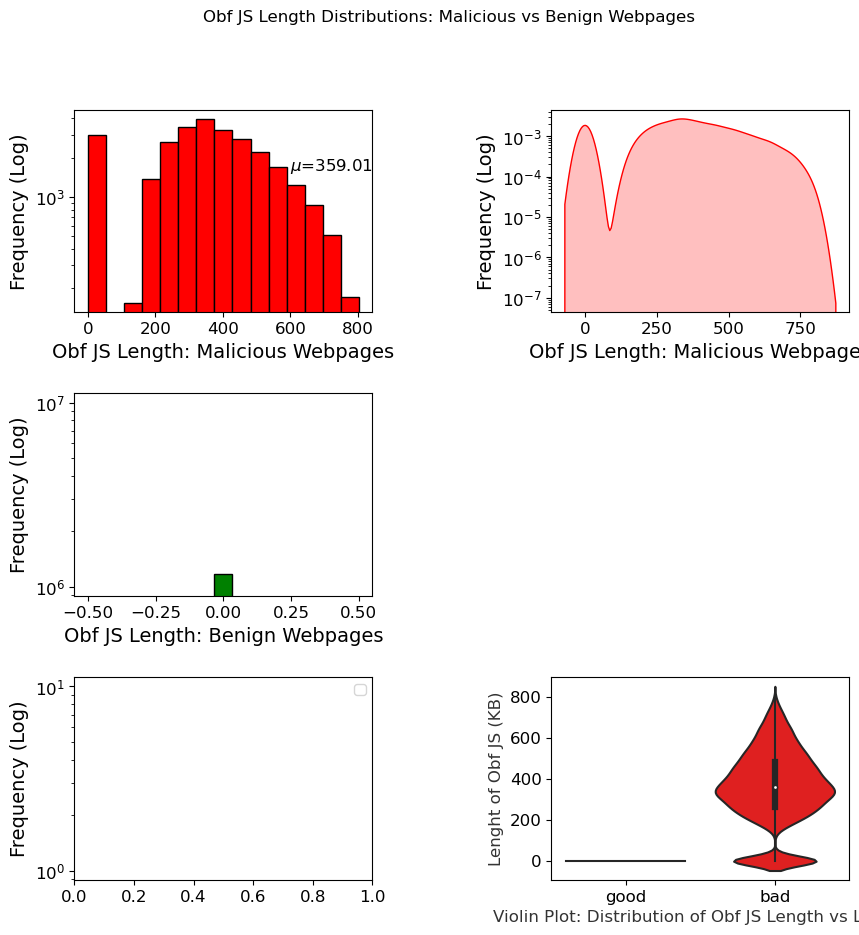

In [18]:
# js_obf_len analysis vis-a-vis malicious and benign webpages

# Histogram of Obfuscated JavaScript Length: Malicious Webpages 
fig = plt.figure(figsize =(10,10))
title = fig.suptitle("Obf JS Length Distributions: Malicious vs Benign Webpages") 
fig.subplots_adjust(wspace=0.6,hspace=0.4)
ax = fig.add_subplot(3,2,1)
ax.set_xlabel("Obf JS Length: Malicious Webpages")
ax.set_ylabel("Frequency (Log)") 
plt.yscale('log', nonpositive='clip')
ax.text(600, 1600, r'$\mu$='+str(round(df_train_bad['js_obf_len'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(df_train_bad['js_obf_len'], color='red', bins=15, edgecolor='black', linewidth=1)
                                    
# Density Plot of js_obf_len: Malicious Webpages
ax1 = fig.add_subplot(3,2,2)
ax1.set_xlabel("Obf JS Length: Malicious Webpages")
ax1.set_ylabel("Frequency (Log)")
plt.yscale('log', nonpositive='clip')
sns.kdeplot(df_train_bad['js_obf_len'],ax=ax1,shade=True,color='red')

# Histogram of js_obf_len: Benign Webpages 
ax2 = fig.add_subplot(3,2,3)
ax2.set_xlabel("Obf JS Length: Benign Webpages")
ax2.set_ylabel("Frequency (Log)") 
plt.yscale('log', nonpositive='clip') 
ax2.hist(df_train_good['js_obf_len'], color='green', bins=15, edgecolor='black', linewidth=1)                                    

#Combined Plot of Malicious & Benign Webpages using Histogram
ax3 = fig.add_subplot(3,2,5)
ax3.set_ylabel("Frequency (Log)")
plt.yscale('log', nonpositive='clip')
g = sns.FacetGrid(df_train, hue='label', palette={"good": "g", "bad": "r"})
g.map(sns.distplot, 'js_obf_len', kde=False, bins=15, ax=ax3)
ax3.legend(prop={'size':10})
plt.tight_layout()

# Violin Plots of 'js_obf_len'
ax4 = fig.add_subplot(3,2,6)
sns.violinplot(x="label", y="js_obf_len", data=df_train, ax=ax4)
ax4.set_xlabel("Violin Plot: Distribution of Obf JS Length vs Labels",size = 12,alpha=0.8)
ax4.set_ylabel("Lenght of Obf JS (KB)",size = 12,alpha=0.8)

plt.close()

Very few Benign Webpages have obfuscated JavaScript code. On the other hand, Malicious Webpages have an average Obfuscated JavaScript length of 359.01 KB. A clear pattern emerges here.

In [19]:
df_train.describe()

url_len        js_len    js_obf_len
count  1.200000e+06  1.200000e+06  1.200000e+06
mean   3.585337e+01  1.191463e+02  8.153424e+00
std    1.441089e+01  9.046649e+01  6.001398e+01
min    1.200000e+01  0.000000e+00  0.000000e+00
25%    2.600000e+01  6.650000e+01  0.000000e+00
50%    3.200000e+01  1.120000e+02  0.000000e+00
75%    4.200000e+01  1.580000e+02  0.000000e+00
max    7.210000e+02  8.541000e+02  8.028540e+02

In [20]:
#Statistical Values of all three numerical Columns: Segregated Based on Class Labels
df_train_good= df_train.loc[df_train['label']=='good']
df_train_bad= df_train.loc[df_train['label']=='bad']
subset_attributes = ['url_len', 'js_len', 'js_obf_len']
g = round(df_train_good[subset_attributes].describe(),2)
b = round(df_train_bad[subset_attributes].describe(),2)
pd.concat([g,b], axis=1, keys=['Benign Webpages Statistics', 'Malicious Webpages Statistics'])

Benign Webpages Statistics                         \
                         url_len      js_len js_obf_len   
count                 1172747.00  1172747.00  1172747.0   
mean                       35.82      108.99        0.0   
std                        14.42       53.97        0.0   
min                        12.00        0.00        0.0   
25%                        26.00       65.50        0.0   
50%                        32.00      110.00        0.0   
75%                        42.00      155.00        0.0   
max                       721.00      199.50        0.0   

      Malicious Webpages Statistics                       
                            url_len    js_len js_obf_len  
count                      27253.00  27253.00   27253.00  
mean                          37.15    555.98     359.01  
std                           14.02    199.36     180.63  
min                           13.00      0.00       0.00  
25%                           27.00    431.10     261.86  
50%                           33.00    569.70     361.35  
75%                           45.00    714.60     478.86  
max                          416.00    854.10     802.85

Diferences in the the values of 'js_len' and 'js_obf_len' for the two class labels

Text(0.5, 0, 'url_len')

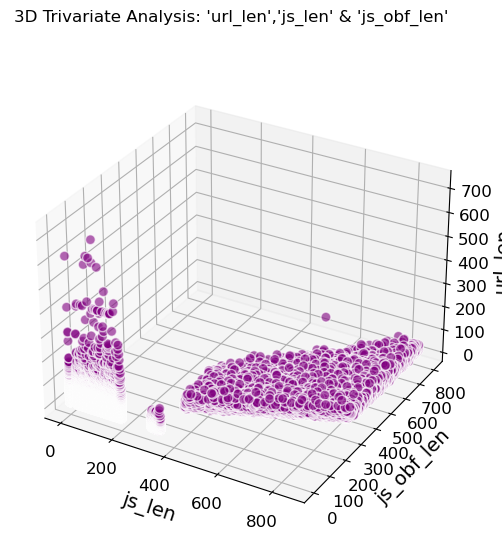

In [21]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
title = fig.suptitle("3D Trivariate Analysis: 'url_len','js_len' & 'js_obf_len'")
xs = df_train.iloc[:,]['js_len']
ys = df_train.iloc[:,]['js_obf_len']
zs = df_train.iloc[:,]['url_len']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w',color='purple')
ax.set_xlabel('js_len')
ax.set_ylabel('js_obf_len')
ax.set_zlabel('url_len')


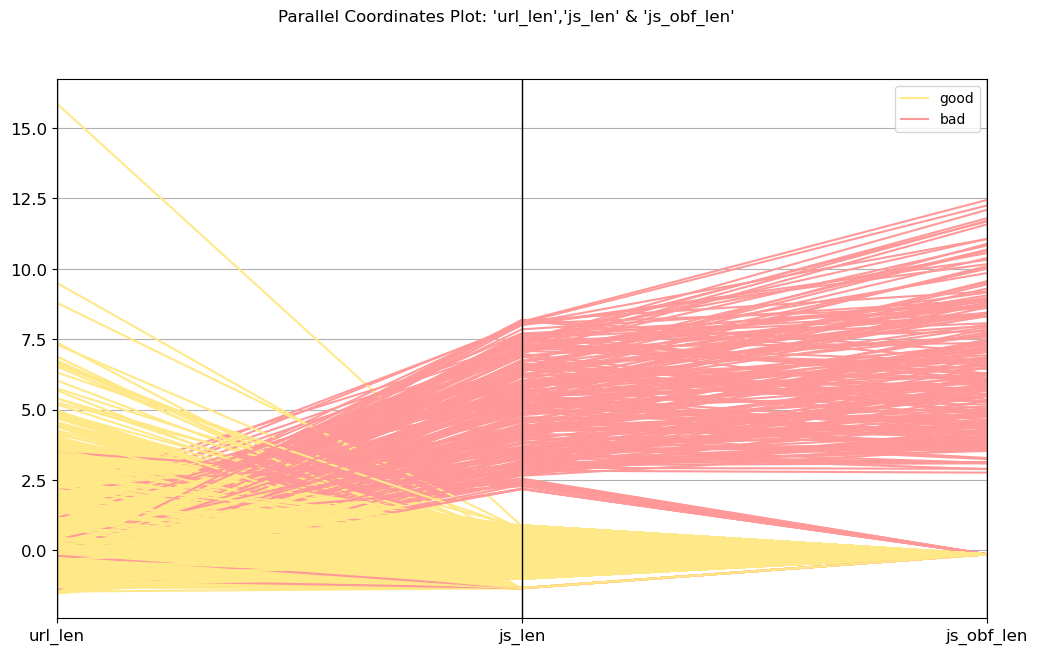

In [22]:
#Parallel Coordinates Plot:url_len, js_len & js_obf_len vs Malicious & Benign Webpages
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

start_time= time.time()
# Scaling attribute values to avoid few outiers
cols = ['url_len','js_len','js_obf_len']
subset_df = df_train.iloc[:10000,][cols]
ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, df_train.iloc[:10000,]['label']], axis=1)
final_df
# plot parallel coordinates
fig=plt.figure(figsize = (12,7))
title = fig.suptitle("Parallel Coordinates Plot: 'url_len','js_len' & 'js_obf_len'")
pc = parallel_coordinates(final_df, 'label', color=('#FFE888', '#FF9999'))



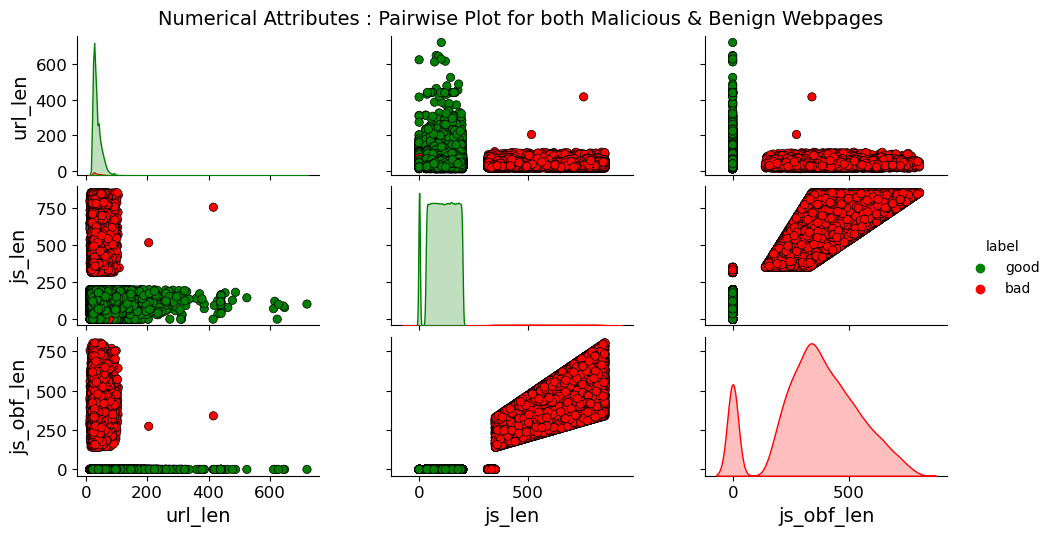

In [23]:
# Scatter Plot with Hue for visualising data in 3-D
cols = ['url_len', 'js_len', 'js_obf_len','label']
pp = sns.pairplot(df_train[cols], hue='label', size=1.8, aspect=1.8, 
                  palette={"good": "green", "bad": "red"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Numerical Attributes : Pairwise Plot for both Malicious & Benign Webpages', fontsize=14)


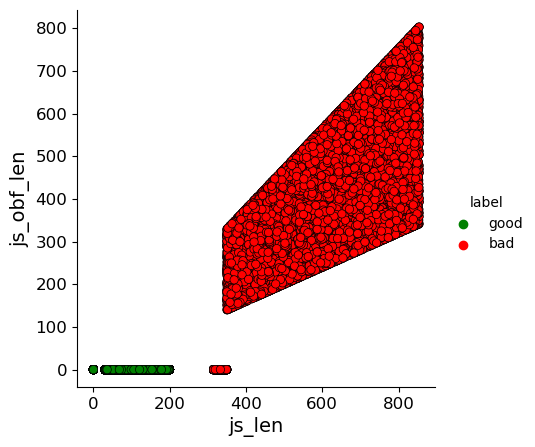

In [24]:
# Scatter Plot of 'js_len' and 'js_obf_len'
pp=sns.pairplot(df_train,x_vars=["js_len"],y_vars=["js_obf_len"],size=4.5,hue="label",
palette={"good": "green", "bad": "red"},plot_kws=dict(edgecolor="k",linewidth=0.5))


4725 4725


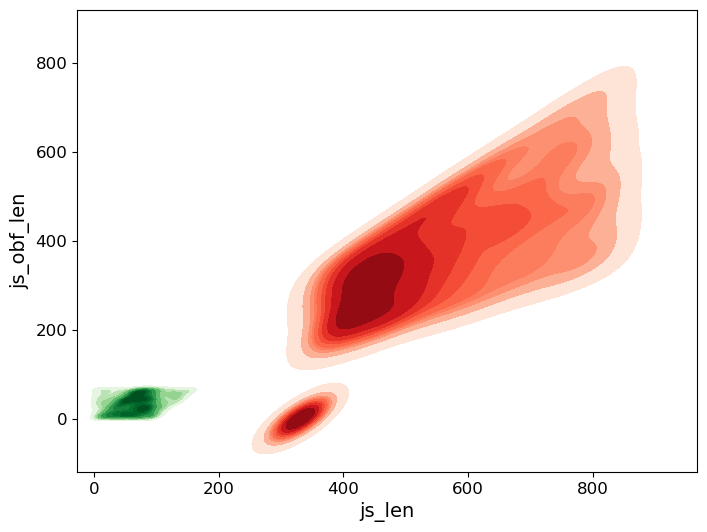

In [25]:
#Bivariate Density Plot: 'js_len' & 'js_obf_len'
df_trial_good= df_train_good.iloc[:5000,]
df_trial_good['js_obf_len']= df_trial_good['js_obf_len'].apply(lambda x: randrange(70))
df_trial_good['js_len']= df_trial_good['js_obf_len'].apply(lambda x: x*randrange(2)+randrange(100))
df_trial_good.dropna(inplace=True)

df_trial_bad= df_train_bad.iloc[:5000,]
df_trial_bad= df_trial_bad.loc[df_trial_bad['js_len']>50]

print(len(df_trial_bad['js_len']), len(df_trial_bad['js_obf_len']))

fig, ax = plt.subplots(figsize=(8, 6))

sns.kdeplot(data=df_trial_bad, x='js_len', y='js_obf_len',
            cmap='Reds', shade=True, shade_lowest=False, ax=ax)

sns.kdeplot(data=df_trial_good, x='js_len', y='js_obf_len',
            cmap='Greens', shade=True, shade_lowest=False, ax=ax)
plt.show()


## Attribute 'tdl' Top Level Domain

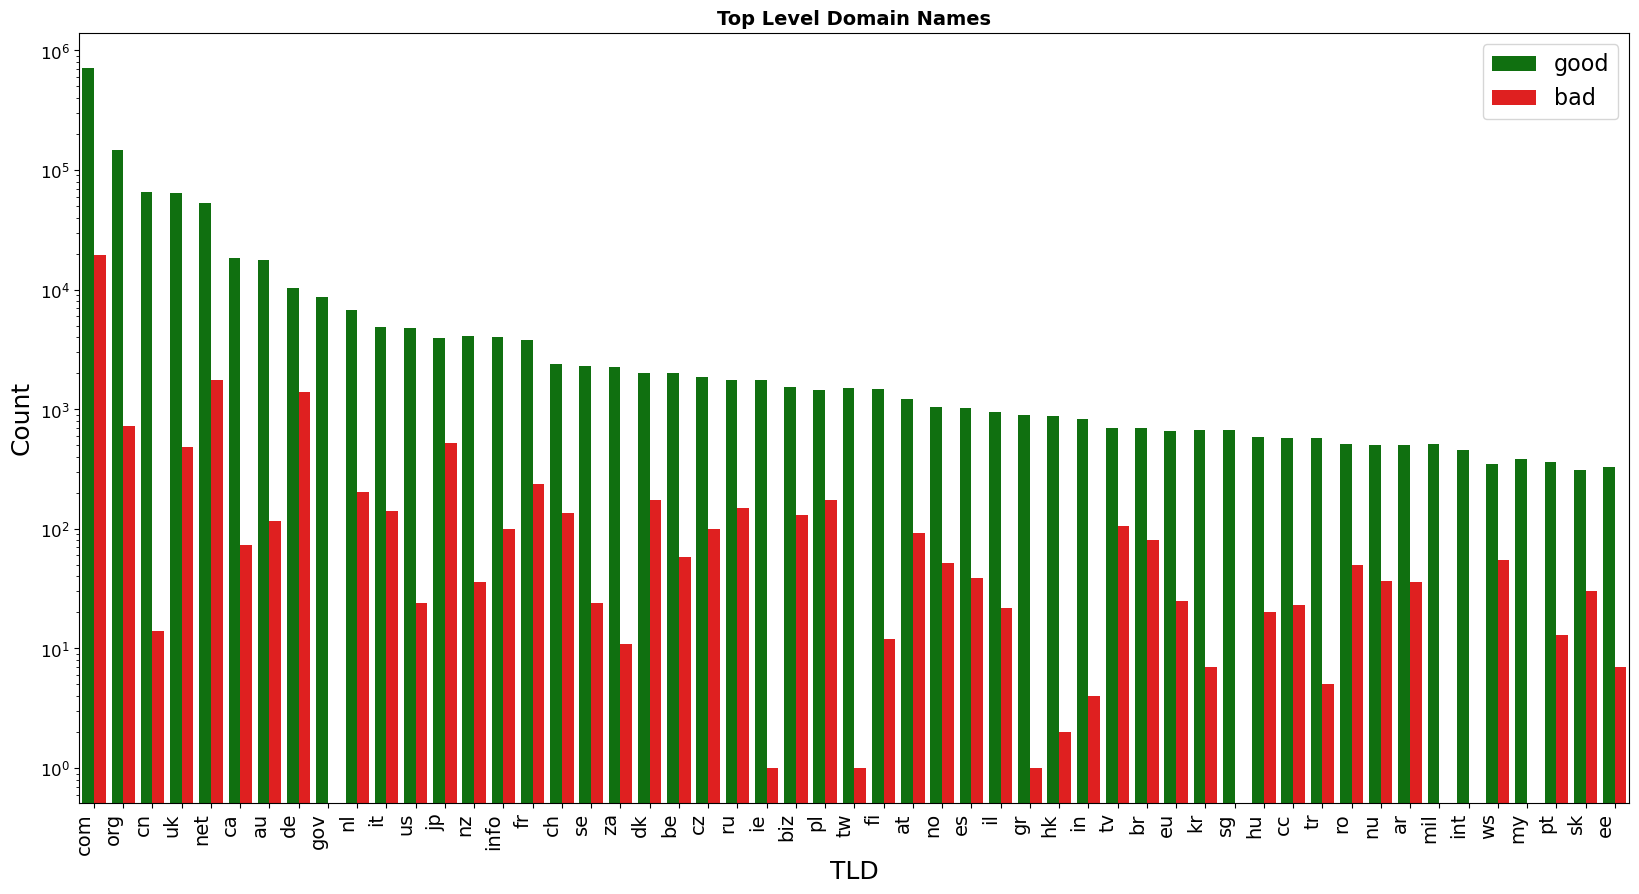

In [26]:
# 'tld' Histogram
import re

def tld(s):
    p= re.split('\.',s)
    return p[-1]   
df_trial = df_train.iloc[:,]
df_trial['tld']= df_trial['tld'].apply(tld)
df_trial['tld'].replace({'edu':'cn'},inplace=True)
df_trial= df_trial.groupby('tld').filter(lambda x : len(x)>300)
fig=plt.figure(figsize=(20,10))
ax = sns.countplot(x='tld',data=df_trial,hue='label',
                   order=df_trial['tld'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha="right",fontsize=14)
plt.title('Top Level Domain Names', fontsize=14, fontweight='bold')
ax.legend(loc='upper right',fontsize=16)
plt.xlabel('TLD',fontsize=18)
plt.ylabel('Count',fontsize=18)
ax.set_yscale("log")
plt.show()

There are no clear pattern emerges with respect to 'tld' when plotted for both the classes

## Attribute 'who_is'

Attribute that has 2 values: 'complete' and 'incomplete, reflecting whether the registration details are complete or not.

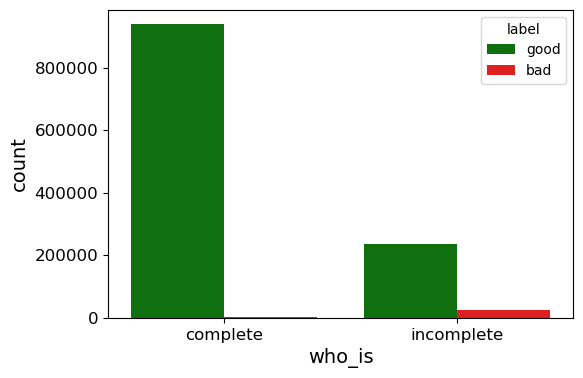

In [27]:
# Multi-bar Plot of 'who_is' attribute: Malicious vs Benign Webpages
fig= plt.figure(figsize = (6,4))
cp = sns.countplot(x="who_is", hue="label", data=df_train, 
                   palette={"good": "green", "bad": "red"})

Malicious webpages are more likely to have incomeplete registration details vis-a-vis Benign webpages.

## Attribute 'https' 

values: 'yes' or 'no'

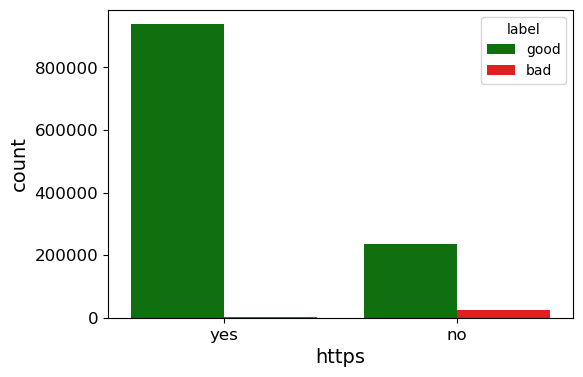

In [28]:
fig= plt.figure(figsize = (6,4))
cp = sns.countplot(x="https", hue="label", data=df_train, 
                   palette={"good": "green", "bad": "red"})


More Benign webpages use HTTPS protocol than Malicious webpages.

## Attribute 'content' 

Raw web content of the webpage, including JavaScript code. However, this raw web content was cleaned and processed to remove punctuations, stop words, etc., in order to reduce data size. The web content has been stored as a separate attribute in the dataset, so that more attributes could be extracted for future requirements.

### Analyses:
#### Sentiment Polarity Analysis of Web Content:

In [29]:
from textblob import TextBlob
import plotly.graph_objects as go

# Adding Sentiment Polarity Column to a new Dataset 
df_trial =df_train.iloc[0:10000,]
df_trial['polarity'] = df_trial['content'].map(lambda content: TextBlob(content).sentiment.polarity)
#df_trial
df_trial_good = df_trial.loc[df_train['label']=='good']
df_trial_bad = df_trial.loc[df_train['label']=='bad']
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['polarity'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['polarity'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Sentiment Analysis of Web Content",xaxis_title="Sentiment Polarity Score",yaxis_title="Count")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Profanity Analysis of Web Content (import não funfa)

In [30]:
# give profanity score to Web Content using the Profanity_Check Library
from profanity_check import predict_prob
import plotly.graph_objects as go

df_trial = df_train.iloc[:100000,]
start_time= time.time()
#Function for calculating profanity in a dataset column
def predict_profanity(df):
    arr=predict_prob(df['content'].astype(str).to_numpy())
    arr= arr.round(decimals=3)
    df['content_profanity'] = pd.DataFrame(data=arr,columns=['content_profanity'])
    #df['url']= df_test['url'].astype(float).round(decimals=3) #rounding probability to 3 decimal places
    return df['content_profanity']

df_trial['content_profanity']= predict_profanity(df_trial)
print("***Total Time taken --- %s seconds ---***" % (time.time() - start_time))

#df_trial : good and bad
df_trial_good = df_trial.loc[df_train['label']=='good']
df_trial_bad = df_trial.loc[df_train['label']=='bad']
#Plotting it on Histograms
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['content_profanity'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['content_profanity'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Profanity Analysis of Web Content",xaxis_title="Profanity Score",yaxis_title="Count")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

***Total Time taken --- 9.774343729019165 seconds ---***


 This analyis gives a score based on bad/obscene words found on the webpage. Malicious webpages have a higher Profanity score vis-a-vis Benign webpages

#### Length of Web Content Analysis

In [31]:
df_trial['content_len'] = df_trial['content'].astype(str).apply(len)
#df_trial : good and bad
df_trial_good = df_trial.loc[df_train['label']=='good']
df_trial_bad = df_trial.loc[df_train['label']=='bad']
#Plotting it on Histograms
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['content_len'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['content_len'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Length of Web Content",xaxis_title="Length",yaxis_title="Count")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

Benign web pages have lesser web content lengths vis-a-vis Malicious Webpages

#### Word Count Analysis

In [32]:
df_trial['content_word_count'] = df_trial['content'].apply(lambda x: len(str(x).split()))
#df_trial : good and bad
df_trial_good = df_trial.loc[df_train['label']=='good']
df_trial_bad = df_trial.loc[df_train['label']=='bad']
#Plotting it on Histograms
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['content_word_count'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['content_word_count'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Word Count Analysis",xaxis_title="Words",yaxis_title="Count")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

Malicious webpages have higher word counts compared to Benign webpages

#### Vector Plotting of Web Content

The content is converted into a 20 code vector using TensorFlow Text Encoder. These 20 code vectors are then stored in a new dataset as 20 different columns. This new dataset is then used for visualisation.

In [33]:
# Using Transfer Learning from Tensorflow hub- Universal Text Encoder
import tensorflow_hub as hub

# Text Encoder with Output fixed 512 vector 
#encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
# Word Embedder with fixed 20 vector output
encoder = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
#encoder(['Hello World']) #For Testing the Encoder

2024-03-20 18:03:43.682815: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 18:03:43.751405: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 18:03:44.009065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 18:03:45.288100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-20 18:03:46.304897: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/b

In [34]:
#Encoding Values in the Dataset
start_time= time.time()
#df_trial
df_trial = df_train.iloc[:100000,]
#df_trial : good and bad
df_trial_good = df_trial.loc[df_train['label']=='good']
df_trial_bad = df_trial.loc[df_train['label']=='bad']

def create_encoded_array(df):
    arr = np.empty((len(df.index), 20))
    for i in range(len(df)):  # Iterate directly over the range of dataframe length
        arr[i, :] = encoder([df.iloc[i]['content']])
    return arr
arr= create_encoded_array(df_trial)
df_content_encoded = pd.DataFrame(data=arr,columns=['c1','c2','c3','c4','c5','c6','c7',
    'c8','c9','c10','c11','c12','c13','c14','c15','c16','c17','c18','c19','c20'])
df_content_encoded['label']=df_trial['label']
print("***Total Time taken --- %s seconds ---***" % (time.time() - start_time))

***Total Time taken --- 47.68530011177063 seconds ---***


***Total Time taken --- 0.13903117179870605 seconds ---***


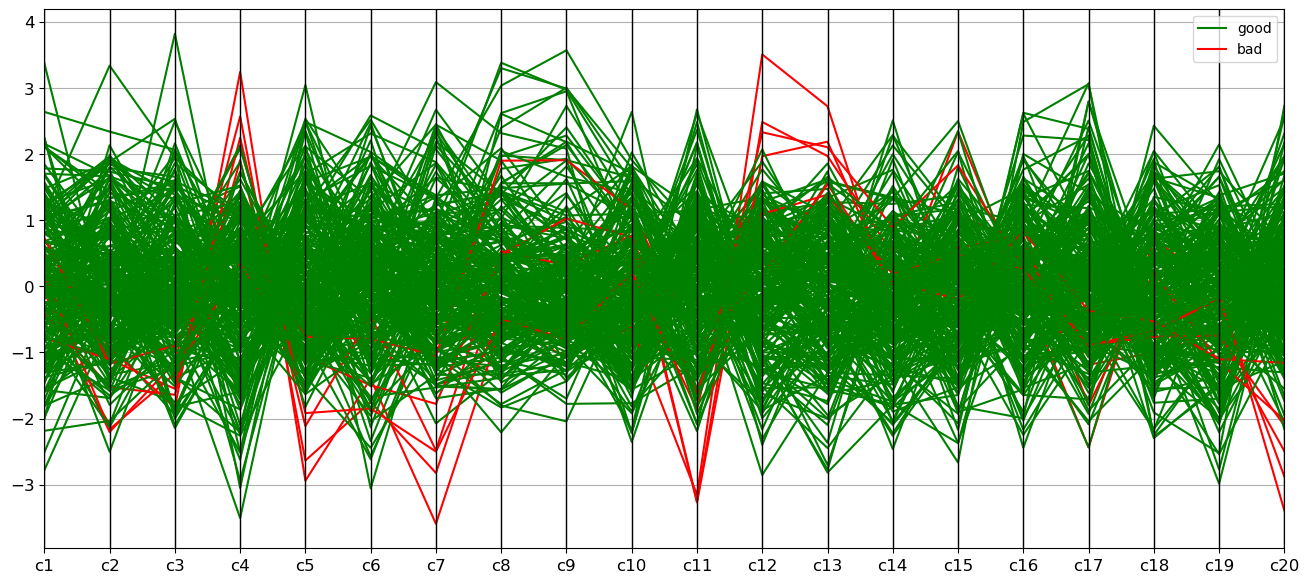

In [35]:
#Parallel Coordinates Plot:Vector Outputs vs Malicious & Benign Webpages
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

start_time= time.time()
# Scaling attribute values to avoid few outiers
cols = ['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16','c17','c18','c19','c20']
subset_df = df_content_encoded[cols]
ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, df_content_encoded['label']], axis=1)
final_df
# plot parallel coordinates
fig= plt.figure(figsize = (16,7))
pc = parallel_coordinates(final_df.iloc[:250,], 'label', color=('green', 'red'))
print("***Total Time taken --- %s seconds ---***" % (time.time() - start_time))

Parallel Coordinates plot for all 20 code vectors representing the web content, few code points show distinction between Malicious and Benign webpages. Thus, these code points together may help in segregating the classes.


## For the purpose of 3D visualisation of the complete dataset, multiple attributes of the dataset are reduced to three principal components using the Principal Component Analysis (PCA):

In [36]:
#Surface Plot after reducing dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(final_df[cols].values)
final_df['pca-one'] = pca_result[:,0]
final_df['pca-two'] = pca_result[:,1] 
final_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.37438488 0.14118358 0.10660458]


Text(0.5, 0.92, '3D Scatter Pot of Complete Dataset Reduced to Three PCA Components')

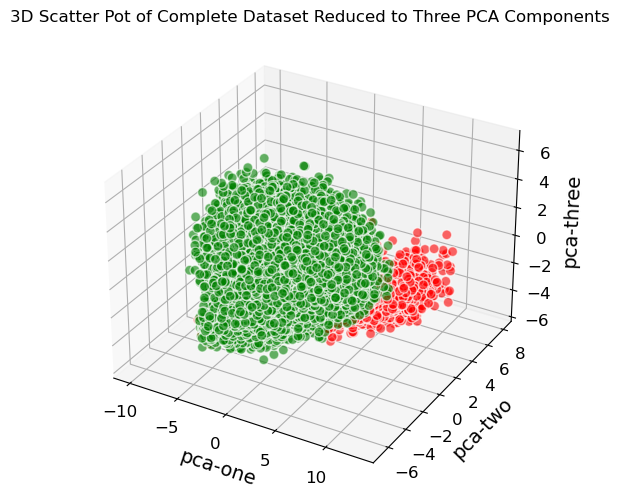

In [37]:
# Visualizing 3-D numeric data with Scatter Plots
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
xs = final_df.loc[final_df['label']=='good']['pca-one']
ys = final_df.loc[final_df['label']=='good']['pca-two']
zs = final_df.loc[final_df['label']=='good']['pca-three']
ax.scatter(xs,ys,zs,s=50, alpha=0.6, edgecolors='w',color='green')
xs = final_df.loc[final_df['label']=='bad']['pca-one']
ys = final_df.loc[final_df['label']=='bad']['pca-two']
zs = final_df.loc[final_df['label']=='bad']['pca-three']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w',color='red')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.set_title("3D Scatter Pot of Complete Dataset Reduced to Three PCA Components")

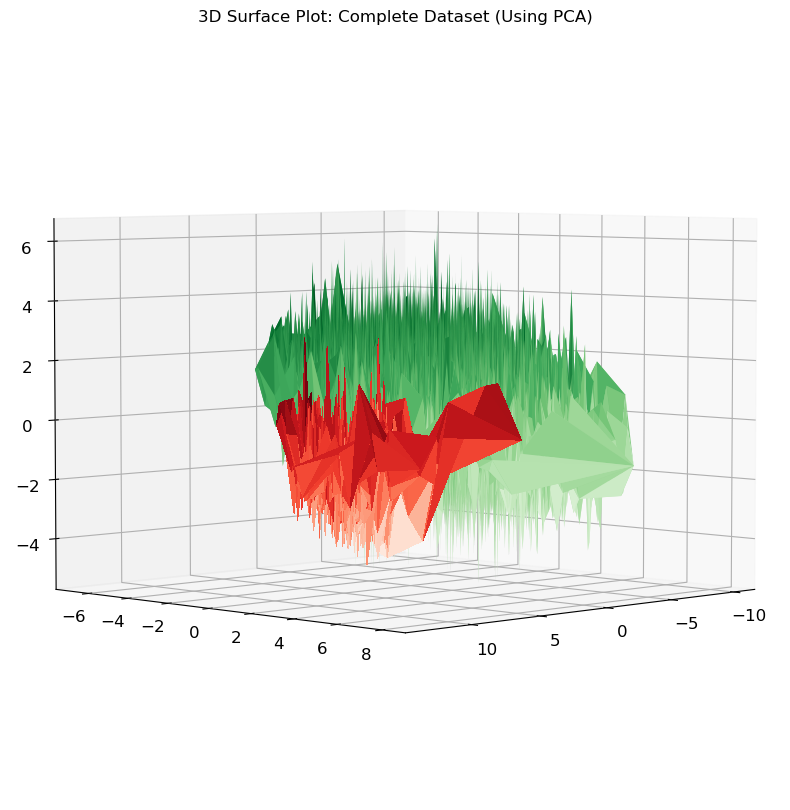

In [38]:
from mpl_toolkits import mplot3d
import random

fig = plt.figure(figsize=(12,10))
x_good = final_df.loc[final_df['label']=='good']['pca-one']
y_good = final_df.loc[final_df['label']=='good']['pca-two']
z_good = final_df.loc[final_df['label']=='good']['pca-three']
x_bad  = final_df.loc[final_df['label']=='bad']['pca-one']
y_bad  = final_df.loc[final_df['label']=='bad']['pca-two']
z_bad  = final_df.loc[final_df['label']=='bad']['pca-three']
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(x_bad,y_bad,z_bad, linewidth=0, antialiased=False,cmap='Reds', edgecolor='none')
surf = ax.plot_trisurf(x_good,y_good,z_good, linewidth=0, antialiased=True,cmap='Greens', edgecolor='none')
ax.set_title('3D Surface Plot: Complete Dataset (Using PCA)')
ax.view_init(4, 45)
plt.show()